In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
r_df = pd.read_csv(city_data_to_load)
c_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
rc_df = pd.merge(r_df,c_df)
rc1_df = rc_df

u = rc1_df.loc[rc1_df['type'] == "Urban"]
r = rc1_df.loc[rc1_df['type'] == "Rural"]
s = rc1_df.loc[rc1_df['type'] == "Suburban"]
types = rc1_df['type'].unique().tolist()
types

['Urban', 'Suburban', 'Rural']

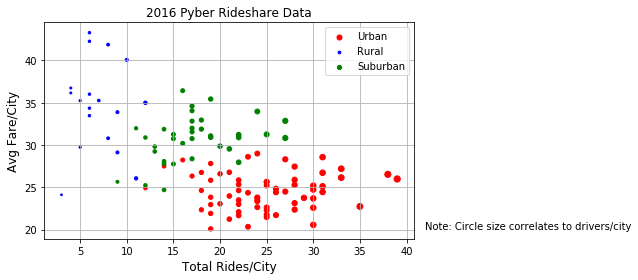

In [2]:
# Obtain the x and y coordinates for each of the three city types
xrc = rc1_df.groupby(['city'], as_index=False).mean() #reversed
yrc = rc1_df.groupby(['city'], as_index=False).count() #reversed

#x,y, coordinates and bubble sizes for total data
xlist = yrc['driver_count'].tolist() 
ylist = xrc['fare'].tolist()
slist = xrc['driver_count'].tolist()

# x coordinates by city type
xs = s.groupby(['city'], as_index=False).count()
xu = u.groupby(['city'], as_index=False).count()
xr = r.groupby(['city'], as_index=False).count()
xslist = xs['driver_count'].tolist()
xulist = xu['driver_count'].tolist()
xrlist = xr['driver_count'].tolist()


# y coordinates by city type
ys = s.groupby(['city'], as_index=False).mean()
yu = u.groupby(['city'], as_index=False).mean()
yr = r.groupby(['city'], as_index=False).mean()
yrlist = yr['fare'].tolist()
yulist = yu['fare'].tolist()
yslist = ys['fare'].tolist()

# (relative, possibly) bubble size values by city type
sulist = xu['driver_count'].tolist() 
srlist = xr['driver_count'].tolist()
ssslist = xs['driver_count'].tolist()
cities = xrc['city'].tolist()
urban = xu['city'].tolist()
rural = xr['city'].tolist()
subs = xs['city'].tolist()



plt.scatter(xulist, yulist, sulist, c='r', label = 'Urban')
plt.scatter(xrlist, yrlist, srlist, c='b', label = 'Rural')
plt.scatter(xslist,yslist,ssslist, c='g',label = 'Suburban')
plt.ylabel('Avg Fare/City', fontsize=12)
plt.xlabel('Total Rides/City', fontsize=12)
plt.title('2016 Pyber Rideshare Data',fontsize=12)
plt.legend(loc = "upper right")
plt.autolayout : True
plt.text(42, 20, "Note: Circle size correlates to drivers/city", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('SCATTER')
plt.show()


## Bubble Plot of Ride Sharing Data

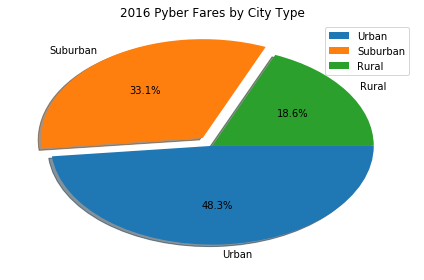

In [3]:
us = pd.Series(yu['fare']).sum()
ss = pd.Series(ys['fare']).sum()
rs = pd.Series(yr['fare']).sum()
yt = pd.Series(xrc['fare']).sum()
plt.title('2016 Pyber Fares by City Type',fontsize=12)
plt.pie([us,ss,rs], labels = ['Urban','Suburban','Rural'] , autopct='%1.1f%%', explode = (0, 0.1, 0),counterclock=False, shadow=True)
plt.legend(loc = "upper right")
plt.tight_layout()
plt.savefig('BUBBLE FARES BY CITY TYPE')
plt.show()

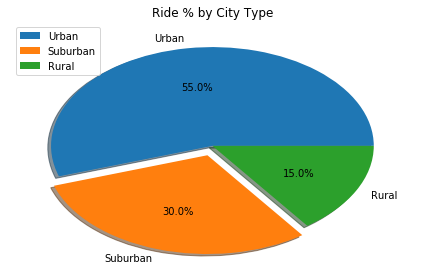

In [4]:
ct = pd.Series(xrc['fare']).count()
cu = pd.Series(yu['fare']).count()
cu1 = cu/ct
cs = pd.Series(ys['fare']).count()
cs1 = cs/ct
cr = pd.Series(yr['fare']).count()
cr1 = cr/ct

plt.title('Ride % by City Type',fontsize=12)
plt.pie([cu1,cs1,cr1], labels = ['Urban','Suburban','Rural'], autopct='%1.1f%%', explode = (0, 0.1, 0), shadow = True)
plt.legend(loc = "upper left")
plt.tight_layout()
plt.savefig('BUBBLE RIDES BY CITY TYPE')
plt.show()

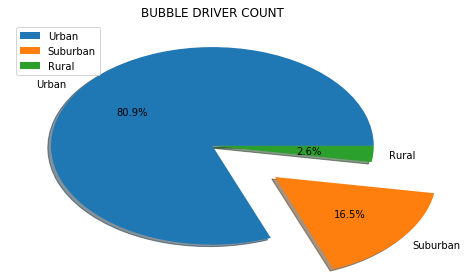

In [5]:
du = pd.Series(yu['driver_count']).sum()
ds = pd.Series(ys['driver_count']).sum()
dr = pd.Series(yr['driver_count']).sum()

plt.title('BUBBLE DRIVER COUNT',fontsize=12)
plt.pie([du,ds,dr], labels = ['Urban','Suburban','Rural'], autopct='%1.1f%%', explode = (0, 0.5, 0), shadow = True)
plt.legend(loc = "upper left")
plt.tight_layout()
plt.savefig('BUBBLE DRIVER COUNT')
plt.show()
